<a href="https://colab.research.google.com/github/gurri/data_science/blob/master/Kaggle%20NYC%20Trip%20Duration%20Prediction/NYC_Trip_duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1S2VhriR7UgD20Rlmb5D-s-j_BNWwNY8p'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train=pd.read_csv('/train.csv')


In [11]:
test=pd.read_csv('/test.csv')


In [13]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [16]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [18]:
#outliers- trip duration

#---lat and long- lat 19.50139 to 64.85694 and longitude from -161.75583 to -68.01197.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [21]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb27ff9790>,
      dtype=object)

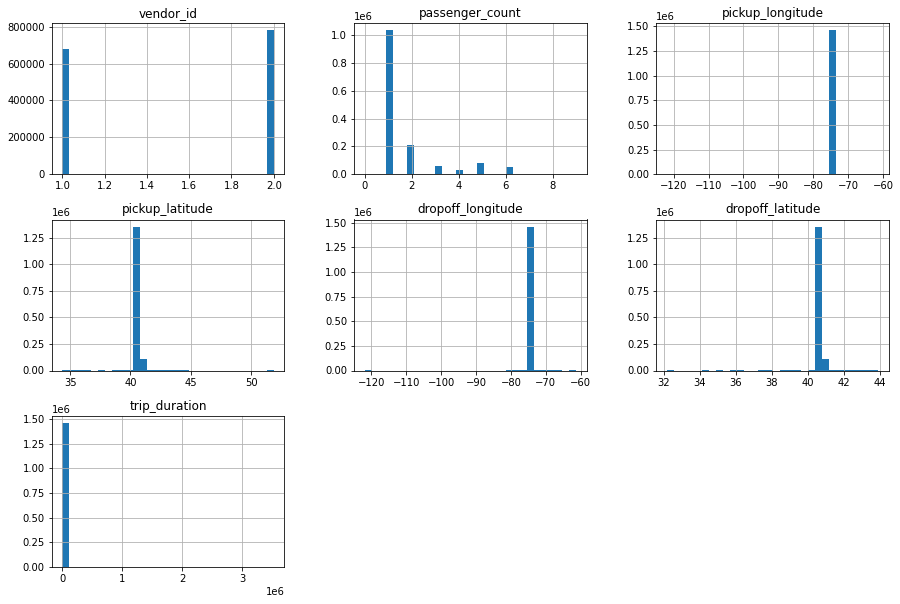

In [22]:

train.hist(bins=30, figsize=(15, 10))

In [31]:
train = train.drop(train[(train.pickup_longitude < -161) | (train.pickup_longitude > -68)].index)

In [32]:
train = train.drop(train[(train.dropoff_longitude < -161) | (train.dropoff_longitude > -68)].index)

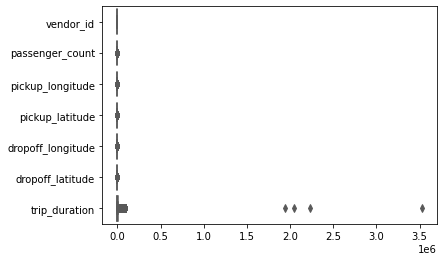

In [33]:
ax = sns.boxplot(data=train, orient="h", palette="Set2")

In [34]:
train['store_and_fwd_flag'].value_counts()

N    1450595
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [36]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=d036352921c10e60cad9a78305a73dddb15ac803c7a8e09153e87392aff5a4a5
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [37]:
import pandasql

In [38]:
pandasql.sqldf('select distinct store_and_fwd_flag,avg(trip_duration) from train group by 1')

,store_and_fwd_flag,avg(trip_duration)
0,N,958.820426
1,Y,1080.763331


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


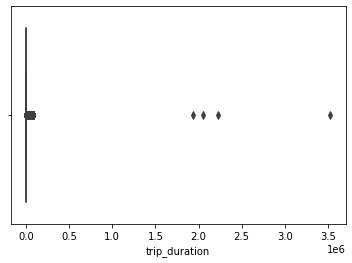

In [40]:
sns.boxplot(train['trip_duration'])

In [43]:
train=train.drop(train[train['trip_duration']>1000].index)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045064 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1045064 non-null  object 
 1   vendor_id           1045064 non-null  int64  
 2   pickup_datetime     1045064 non-null  object 
 3   dropoff_datetime    1045064 non-null  object 
 4   passenger_count     1045064 non-null  int64  
 5   pickup_longitude    1045064 non-null  float64
 6   pickup_latitude     1045064 non-null  float64
 7   dropoff_longitude   1045064 non-null  float64
 8   dropoff_latitude    1045064 non-null  float64
 9   store_and_fwd_flag  1045064 non-null  object 
 10  trip_duration       1045064 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 95.7+ MB


In [47]:
#correlation
train.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.296354,0.003056,0.007271,0.001684,0.007258,0.005910
passenger_count,0.296354,1.000000,-0.002510,-0.002982,-0.002188,-0.000970,0.012331
pickup_longitude,0.003056,-0.002510,1.000000,0.239363,0.935966,0.209832,-0.022760
pickup_latitude,0.007271,-0.002982,0.239363,1.000000,0.213236,0.731418,-0.061821
dropoff_longitude,0.001684,-0.002188,0.935966,0.213236,1.000000,0.239500,-0.004989
dropoff_latitude,0.007258,-0.000970,0.209832,0.731418,0.239500,1.000000,-0.055757
trip_duration,0.005910,0.012331,-0.022760,-0.061821,-0.004989,-0.055757,1.000000


In [53]:
vendor = pd.get_dummies(train.vendor_id)
train=pd.concat([train, vendor], axis=1)


In [55]:
train.columns=[        'id',          'vendor_id',    'pickup_datetime',
         'dropoff_datetime',    'passenger_count',   'pickup_longitude',
          'pickup_latitude',  'dropoff_longitude',   'dropoff_latitude',
       'store_and_fwd_flag',      'trip_duration',  'vendor_1',
                          'vendor_2']

In [56]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'vendor_1', 'vendor_2'],
      dtype='object')

In [ ]:
#convert date time to day of week and time of day categories
# find distance of trip